In [49]:
from google.colab import files
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings('ignore')

In [50]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving iris.csv to iris (2).csv


In [51]:
iris_df = pd.read_csv(filename)

In [52]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


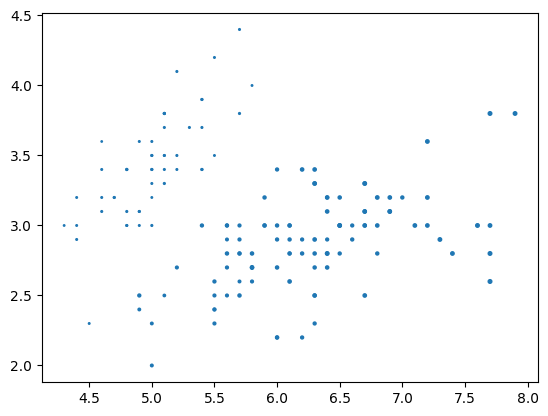

In [54]:
plt.scatter(iris_df['sepal.length'], iris_df['sepal.width'], iris_df['petal.length'])

In [55]:
kmm = KMeans( n_clusters=3)
kmm

KMeans(n_clusters=3)

In [56]:
y_predict =   kmm.fit_predict(iris_df[['sepal.length','sepal.width','petal.length']])

In [57]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [58]:
iris_df['Cluster'] = y_predict

In [59]:
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety,Cluster
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,1
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,1
148,6.2,3.4,5.4,2.3,Virginica,1


In [60]:
df1 = iris_df[iris_df.Cluster == 0]
df2 = iris_df[iris_df.Cluster == 1]
df3 = iris_df[iris_df.Cluster == 2]

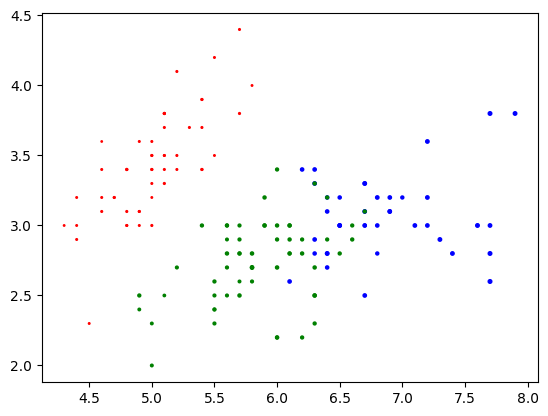

In [61]:
plt.scatter(df1['sepal.length'], df1['sepal.width'], df1['petal.length'], color='red', label='Cluster 0')
plt.scatter(df2['sepal.length'], df2['sepal.width'], df2['petal.length'], color='blue', label='Cluster 1')
plt.scatter(df3['sepal.length'], df3['sepal.width'], df3['petal.length'], color='green', label='Cluster 2')

In [62]:
scaler = MinMaxScaler()
scaler.fit(iris_df[['petal.length']])
iris_df['petal.length']=scaler.transform(iris_df[['petal.length']])
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety,Cluster
0,5.1,3.5,0.067797,0.2,Setosa,0
1,4.9,3.0,0.067797,0.2,Setosa,0
2,4.7,3.2,0.050847,0.2,Setosa,0
3,4.6,3.1,0.084746,0.2,Setosa,0
4,5.0,3.6,0.067797,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,0.711864,2.3,Virginica,1
146,6.3,2.5,0.677966,1.9,Virginica,2
147,6.5,3.0,0.711864,2.0,Virginica,1
148,6.2,3.4,0.745763,2.3,Virginica,1


In [63]:
scaler.fit(iris_df[['sepal.length']])
iris_df['sepal.length'] = scaler.transform(iris_df[['sepal.length']])
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety,Cluster
0,0.222222,3.5,0.067797,0.2,Setosa,0
1,0.166667,3.0,0.067797,0.2,Setosa,0
2,0.111111,3.2,0.050847,0.2,Setosa,0
3,0.083333,3.1,0.084746,0.2,Setosa,0
4,0.194444,3.6,0.067797,0.2,Setosa,0
...,...,...,...,...,...,...
145,0.666667,3.0,0.711864,2.3,Virginica,1
146,0.555556,2.5,0.677966,1.9,Virginica,2
147,0.611111,3.0,0.711864,2.0,Virginica,1
148,0.527778,3.4,0.745763,2.3,Virginica,1


In [64]:
scaler.fit(iris_df[['sepal.width']])
iris_df['sepal.width'] = scaler.transform(iris_df[['sepal.width']])
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety,Cluster
0,0.222222,0.625000,0.067797,0.2,Setosa,0
1,0.166667,0.416667,0.067797,0.2,Setosa,0
2,0.111111,0.500000,0.050847,0.2,Setosa,0
3,0.083333,0.458333,0.084746,0.2,Setosa,0
4,0.194444,0.666667,0.067797,0.2,Setosa,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,2.3,Virginica,1
146,0.555556,0.208333,0.677966,1.9,Virginica,2
147,0.611111,0.416667,0.711864,2.0,Virginica,1
148,0.527778,0.583333,0.745763,2.3,Virginica,1


In [65]:
km = KMeans(n_clusters=3)
y_predict=km.fit_predict(iris_df[['sepal.length','sepal.width','petal.length']])
y_predict

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
iris_df['Cluster']=y_predict
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety,Cluster
0,0.222222,0.625000,0.067797,0.2,Setosa,2
1,0.166667,0.416667,0.067797,0.2,Setosa,0
2,0.111111,0.500000,0.050847,0.2,Setosa,0
3,0.083333,0.458333,0.084746,0.2,Setosa,0
4,0.194444,0.666667,0.067797,0.2,Setosa,2
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,2.3,Virginica,1
146,0.555556,0.208333,0.677966,1.9,Virginica,1
147,0.611111,0.416667,0.711864,2.0,Virginica,1
148,0.527778,0.583333,0.745763,2.3,Virginica,1


In [67]:
df1 = iris_df[iris_df.Cluster == 0]
df2 = iris_df[iris_df.Cluster == 1]
df3 = iris_df[iris_df.Cluster == 2]

### In 2D scatter plot

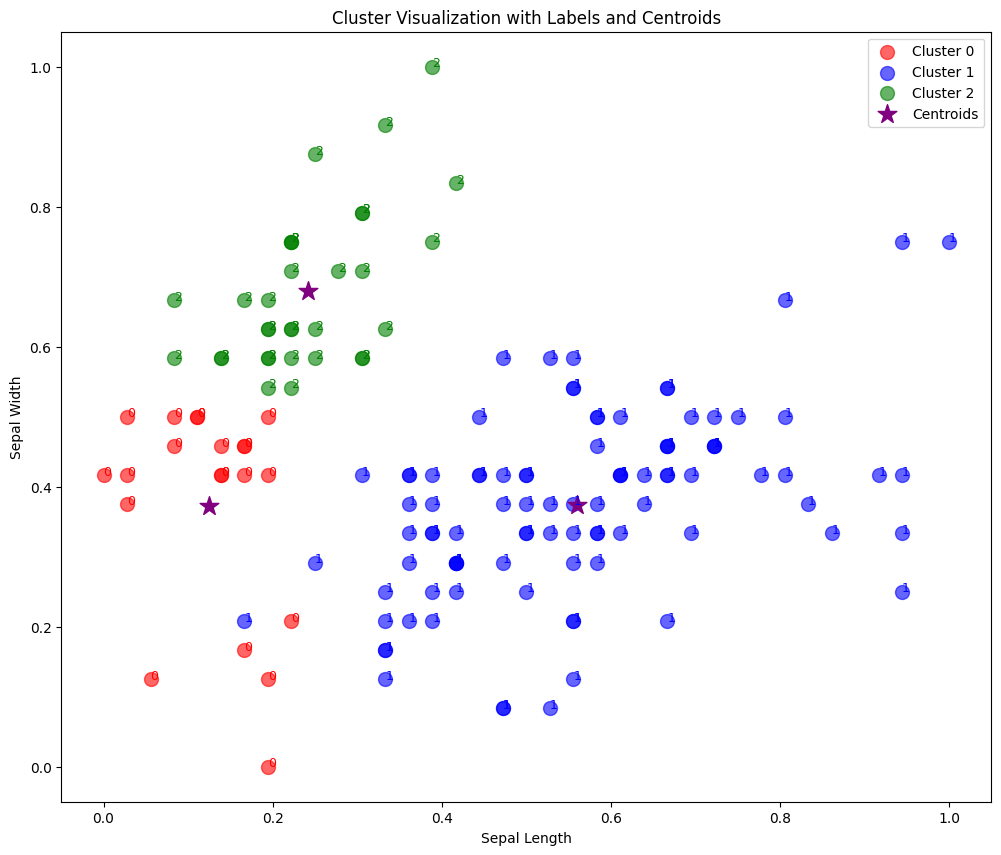

In [69]:
plt.figure(figsize=(12, 10))

plt.scatter(df1['sepal.length'], df1['sepal.width'], s=100, color='red', label='Cluster 0', alpha=0.6)
plt.scatter(df2['sepal.length'], df2['sepal.width'], s=100, color='blue', label='Cluster 1', alpha=0.6)
plt.scatter(df3['sepal.length'], df3['sepal.width'], s=100, color='green', label='Cluster 2', alpha=0.6)


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='Centroids')

# Adding Labels to Each Data Point
for i, cluster in df1.iterrows():
    plt.text(cluster['sepal.length'], cluster['sepal.width'], '0', color='red', fontsize=9)
for i, cluster in df2.iterrows():
    plt.text(cluster['sepal.length'], cluster['sepal.width'], '1', color='blue', fontsize=9)
for i, cluster in df3.iterrows():
    plt.text(cluster['sepal.length'], cluster['sepal.width'], '2', color='green', fontsize=9)

plt.title('Cluster Visualization with Labels and Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend(loc='best')

plt.show()

### 3D scatter plot

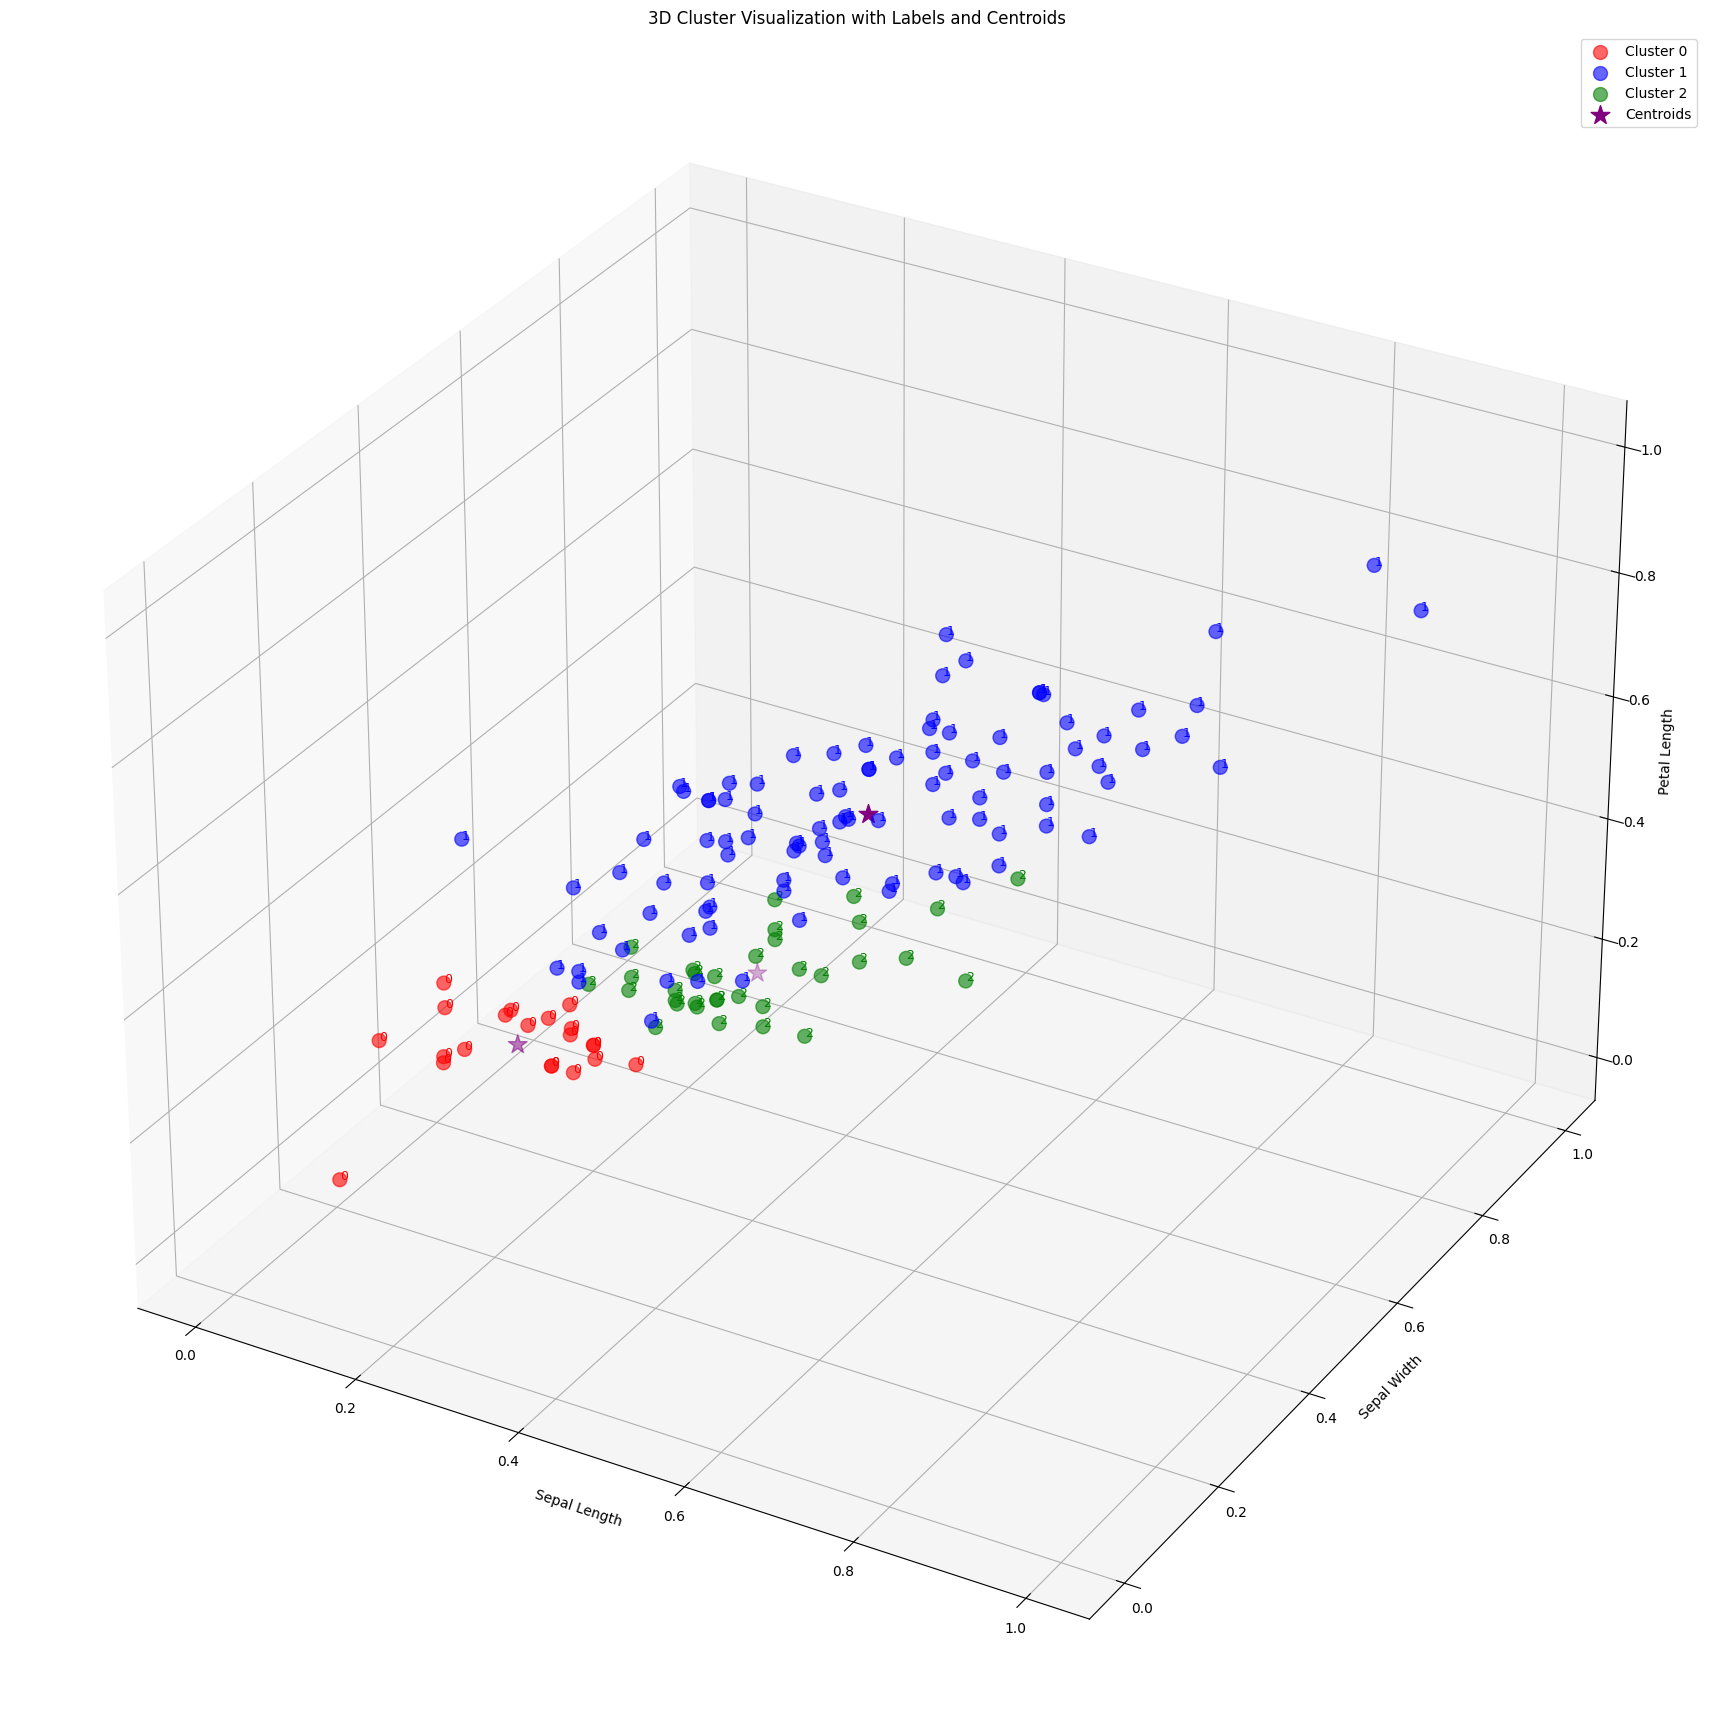

In [81]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(22, 22))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['sepal.length'], df1['sepal.width'], df1['petal.length'], s=100, color='red', label='Cluster 0', alpha=0.6)
ax.scatter(df2['sepal.length'], df2['sepal.width'], df2['petal.length'], s=100, color='blue', label='Cluster 1', alpha=0.6)
ax.scatter(df3['sepal.length'], df3['sepal.width'], df3['petal.length'], s=100, color='green', label='Cluster 2', alpha=0.6)

ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], color='purple', marker='*', s=200, label='Centroids')

for i, cluster in df1.iterrows():
    ax.text(cluster['sepal.length'], cluster['sepal.width'], cluster['petal.length'], '0', color='red', fontsize=9)
for i, cluster in df2.iterrows():
    ax.text(cluster['sepal.length'], cluster['sepal.width'], cluster['petal.length'], '1', color='blue', fontsize=9)
for i, cluster in df3.iterrows():
    ax.text(cluster['sepal.length'], cluster['sepal.width'], cluster['petal.length'], '2', color='green', fontsize=9)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3D Cluster Visualization with Labels and Centroids')

ax.legend(loc='best')

plt.show()